# ゼロからはじめる音響学　実装

In [1]:
import numpy as np
import IPython.display
import matplotlib.pyplot as plt

## 1.2 サイン波と周波数特性

In [2]:
duration = 1 # [s]
freq = 500
signal = np.sin(freq * 2 * np.pi * np.linspace(0, duration, duration * 16000)) # np.linspace(start, end, number of points) 
IPython.display.Audio(signal, rate=16000)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


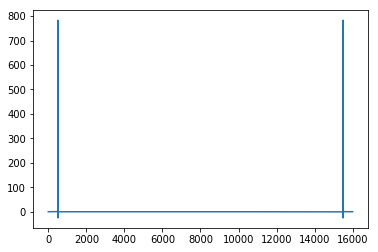

In [3]:
plt.plot(np.fft.fft(signal))

In [4]:
duration = 1
freq = 500
signal = 0.1 * np.sin(freq * 2 * np.pi * np.linspace(0, duration, duration * 16000)) # set little amplitude
IPython.display.Audio(signal, rate=16000) # But it seems same volume. Amplitude normalized..?

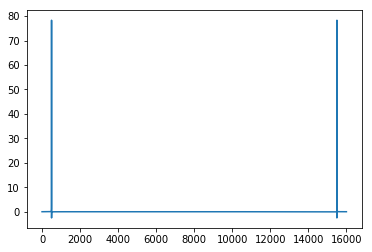

In [5]:
plt.plot(np.fft.fft(signal))

In [6]:
duration = 1
freq = 1000
signal = np.sin(freq * 2 * np.pi * np.linspace(0, duration, duration * 16000))
IPython.display.Audio(signal, rate=16000)

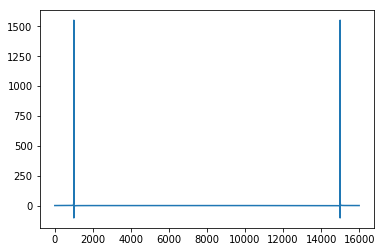

In [7]:
plt.plot(np.fft.fft(signal))

## 1.3 12平均律音階

In [8]:
duration = 1
freq = 440
signal = np.sin(freq * 2 * np.pi * np.linspace(0, duration, duration * 16000))
IPython.display.Audio(signal, rate=16000)

In [9]:
pow(2,1/12)

1.0594630943592953

In [237]:
duration = 0.001
freq = 44
signal = []
for i in range(13):
    signal += np.sin(freq * pow(2,i/12) * 2 * np.pi * np.linspace(0, duration, duration * 16000)).tolist()
IPython.display.Audio(signal, rate=16000)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


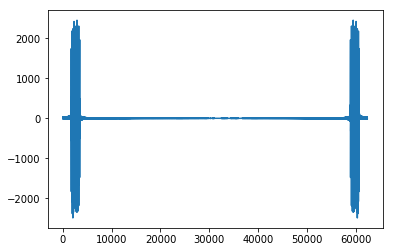

In [11]:
plt.plot(np.fft.fft(signal))

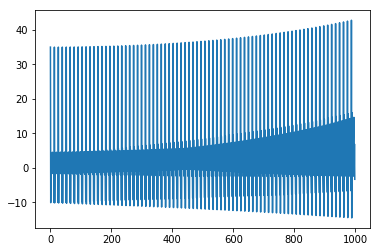

In [12]:
plt.plot(np.fft.fft(signal)[:1000])

In [227]:
duration = 0.2
freq = 220 * pow(2,3/12) # C6
signal = []
for i in [0,2,4,5,7,9,11,12]: # ドレミファソラシド
    signal += np.sin(freq * pow(2,i/12) * 2 * np.pi * np.linspace(0, duration, duration * 16000)).tolist()
IPython.display.Audio(signal, rate=16000)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


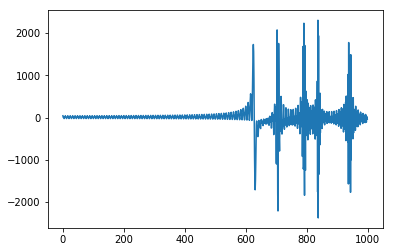

In [14]:
plt.plot(np.fft.fft(signal)[:1000])

## 2.1 サイン波の重ね合わせ

In [15]:
duration = 1
signal1 = np.sin(500 * 2 * np.pi * np.linspace(0, duration, duration * 16000))
signal2 = np.sin(1375 * 2 * np.pi * np.linspace(0, duration, duration * 16000))
signal3 = np.sin(1000 * 2 * np.pi * np.linspace(0, duration, duration * 16000))

In [16]:
IPython.display.Audio(signal1, rate=16000)

In [17]:
IPython.display.Audio(signal2, rate=16000)

In [18]:
IPython.display.Audio(signal1+signal2, rate=16000)

In [19]:
IPython.display.Audio(signal1+signal3, rate=16000)

In [20]:
duration = 0.3
freq = 220 * pow(2,3/12)
signal = np.zeros(int(16000* len([0,2,4,5,7,9,11,12]) * 0.3 ))
for j in range(1,2): # この数字を増やすと音色が明るくなる
    sig = []
    for i in [0,2,4,5,7,9,11,12]:
        sig += np.sin(j * freq * pow(2,i/12) * 2 * np.pi * np.linspace(0, duration, duration * 16000)).tolist()
    signal += sig
IPython.display.Audio(signal, rate=16000)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


## 2.2 ノコギリ波

In [21]:
duration = 1
freq = 500
signal = np.zeros(16000)
for j in range(1,50):
    signal += np.sin(j * freq  * 2 * np.pi * np.linspace(0, duration, duration * 16000)) / j
IPython.display.Audio(signal, rate=16000)

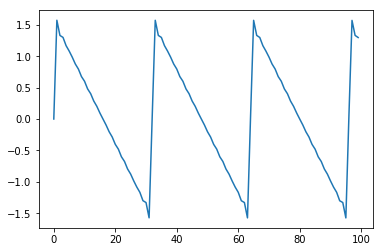

In [22]:
plt.plot(signal[:100])

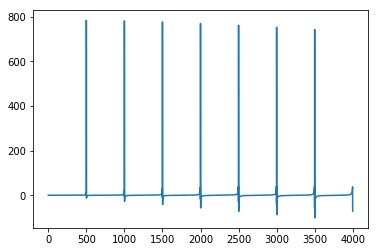

In [23]:
plt.plot(np.fft.fft(signal)[:4000])

## 2.3  矩形波

In [24]:
duration = 1
freq = 500
signal = np.zeros(16000)
for j in range(1,50):
    signal += np.sin((2*j-1) * freq  * 2 * np.pi * np.linspace(0, duration, duration * 16000)) / (2*j-1)
IPython.display.Audio(signal, rate=16000)

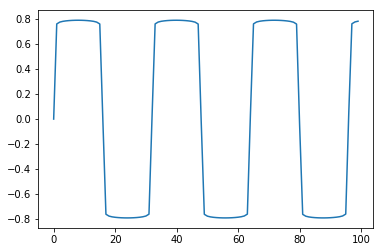

In [25]:
plt.plot(signal[:100])

## 2.4 三角波

In [26]:
duration = 1
freq = 500
signal = np.zeros(16000)
for j in range(1,50):
    signal += np.sin((2*j-1) * freq  * 2 * np.pi * np.linspace(0, duration, duration * 16000)) / (2*j-1)**2 * (-1)**(j+1)
IPython.display.Audio(signal, rate=16000)

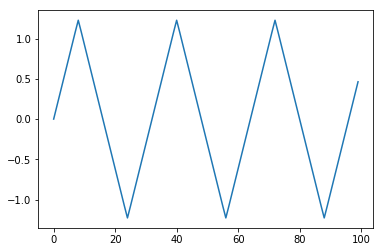

In [27]:
plt.plot(signal[:100])

## 2.5 位相

In [28]:
duration = 1
freq = 500
signal = np.zeros(16000)
for j in range(1,50):
    signal += np.cos(j * freq  * 2 * np.pi * np.linspace(0, duration, duration * 16000)) / j
IPython.display.Audio(signal, rate=16000)

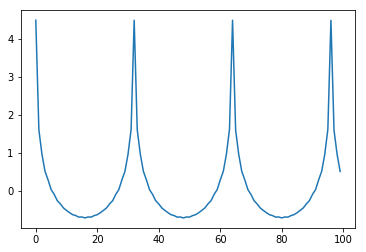

In [29]:
plt.plot(signal[:100])

## 2.6 白色雑音

In [30]:
duration = 1
freq = 8000
signal = np.zeros(16000)
for j in range(1,2000):
    theta = np.random.rand() # 位相をずらす
    signal += np.sin(freq * np.random.rand() * 2 * np.pi * np.linspace(theta*duration, theta*duration+duration, duration * 16000))
IPython.display.Audio(signal, rate=16000)

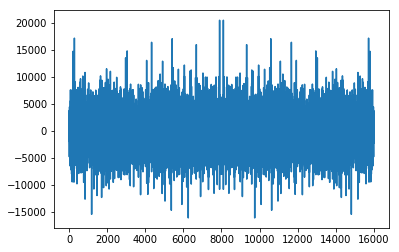

In [31]:
plt.plot(np.fft.fft(signal))

## 3.2 フィルタ

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


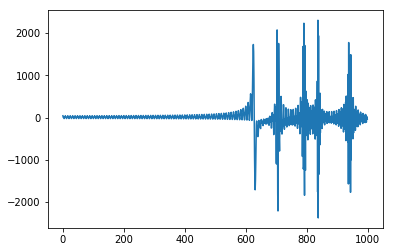

In [51]:
from scipy.signal import firwin, lfilter
duration = 0.3
freq = 220 * pow(2,3/12)
signal = np.zeros(int(16000* len([0,2,4,5,7,9,11,12]) * 0.3 ))
for j in range(1,2): # この数字を増やすと音色が明るくなる
    sig = []
    for i in [0,2,4,5,7,9,11,12]:
        sig += np.sin(j * freq * pow(2,i/12) * 2 * np.pi * np.linspace(0, duration, duration * 16000)).tolist()
    signal += sig
plt.plot(np.fft.fft(signal)[:1000])
IPython.display.Audio(signal, rate=16000)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


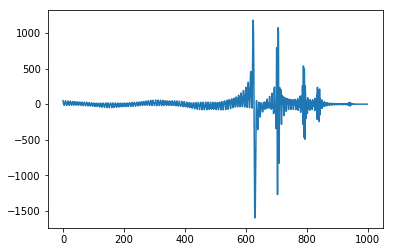

In [52]:
fe = 600/16000
b = firwin(255, fe) 
signal = lfilter(b, 1, signal)
plt.plot(np.fft.fft(signal)[:1000])
IPython.display.Audio(signal, rate=16000)

## 3.8 広帯域スペクトログラム

波形を小さく区切って周波数分析を行うと、時間分解能は細かくなるが、周波数分解能は粗くなる

In [ ]:
import librosa

In [ ]:
duration = 0.3
freq = 220 * pow(2,3/12)
signal = np.zeros(int(16000* len([0,2,4,5,7,9,11,12]) * 0.3 ))
for j in range(1,2): # この数字を増やすと音色が明るくなる
    sig = []
    for i in [0,2,4,5,7,9,11,12]:
        sig += np.sin(j * freq * pow(2,i/12) * 2 * np.pi * np.linspace(0, duration, duration * 16000)).tolist()
    signal += sig

In [ ]:
plt.specgram(signal, NFFT=128, Fs=16000, noverlap=0)
plt.show()

## 3.9 狭帯域スペクトログラム

In [ ]:
plt.specgram(signal, NFFT=1024, Fs=16000, noverlap=0)
plt.show()

Audacityでもスペクトログラムを表示できる

## 4.11 うなり

In [ ]:
duration = 5
signal1 = np.sin(500 * 2 * np.pi * np.linspace(0, duration, duration * 16000))
signal2 = np.sin(501 * 2 * np.pi * np.linspace(0, duration, duration * 16000))
IPython.display.Audio(signal1+signal2, rate=16000)

In [ ]:
duration = 1
freq = 500
signal = np.zeros(16000)
for j in range(1,50):
    signal += np.sin((2*j-1) * freq  * 2 * np.pi * np.linspace(0, duration, duration * 16000)) / (2*j-1)
IPython.display.Audio(signal, rate=16000)

In [ ]:
duration = 1
freq = 500
signal = np.zeros(16000)
for k in range(2):
    for j in range(1,50):
        signal += np.sin((2*j-1) * (freq+k)  * 2 * np.pi * np.linspace(0, duration, duration * 16000)) / (2*j-1) # デチューン
IPython.display.Audio(signal, rate=16000)

## 5.5 声道

In [ ]:
vowel_formant = [
[800,1200,2500,3500],
[300,2300,2900,3500],
[300,1200,2500,3500],
[500,1900,2500,3500],
[500,800,2500,3500],
]

In [113]:
duration = 1
signal = np.zeros(16000)
for freq in vowel_formant[0]:
    signal += np.sin(freq * 2 * np.pi * np.linspace(0, duration, duration * 16000))
IPython.display.Audio(signal, rate=16000)

In [114]:
duration = 1
signal = np.zeros(16000)
for freq in vowel_formant[1]:
    signal += np.sin(freq * 2 * np.pi * np.linspace(0, duration, duration * 16000))
IPython.display.Audio(signal, rate=16000)

In [115]:
duration = 1
signal = np.zeros(16000)
for freq in vowel_formant[2]:
    signal += np.sin(freq * 2 * np.pi * np.linspace(0, duration, duration * 16000))
IPython.display.Audio(signal, rate=16000)

In [116]:
duration = 1
signal = np.zeros(16000)
for freq in vowel_formant[3]:
    signal += np.sin(freq * 2 * np.pi * np.linspace(0, duration, duration * 16000))
IPython.display.Audio(signal, rate=16000)

In [117]:
duration = 1
signal = np.zeros(16000)
for freq in vowel_formant[4]:
    signal += np.sin(freq * 2 * np.pi * np.linspace(0, duration, duration * 16000))
IPython.display.Audio(signal, rate=16000)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


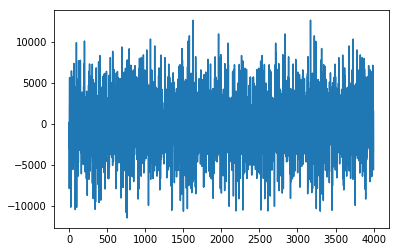

In [135]:
duration = 0.3
freq = 8000
white_signal = np.zeros(int(16000*duration))
for j in range(1,10000):
    theta = np.random.rand() # 位相をずらす
    white_signal += np.sin(freq * np.random.rand() * 2 * np.pi * np.linspace(theta*duration, theta*duration+duration, duration * 16000))
plt.plot(np.fft.fft(white_signal)[:4000])
IPython.display.Audio(white_signal, rate=16000)

In [154]:
def bpf(signal,freq):
    dt = 1/16000
    filter = firwin(numtaps=127, cutoff=[freq-10, freq+10], fs=1/dt, pass_zero=False)
    signal = lfilter(filter, 1, signal)
    return signal

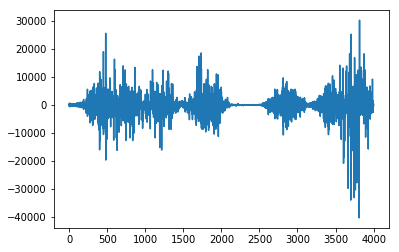

In [155]:
signal = []
for formant in vowel_formant:
    sig = np.zeros(int(16000*duration))
    for freq in formant:
        sig += bpf(white_signal,freq)
    signal += sig.tolist()
plt.plot(np.fft.fft(signal)[:4000])
IPython.display.Audio(signal, rate=16000)

## 7.6 聴力検査

In [195]:
duration = 10
freq = 18800
signal = np.sin(freq * 2 * np.pi * np.linspace(0, duration, duration * 44100))
IPython.display.Audio(signal, rate=44100)

In [200]:
duration = 1
freq = 13
signal = np.sin(freq * 2 * np.pi * np.linspace(0, duration, duration * 16000))
IPython.display.Audio(signal, rate=16000)

## 9.5 音の持続時間

In [202]:
duration = 0.2
freq = 440
signal = np.sin(freq * 2 * np.pi * np.linspace(0, duration, duration * 44100))
IPython.display.Audio(signal, rate=44100)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


In [203]:
duration = 0.1
freq = 440
signal = np.sin(freq * 2 * np.pi * np.linspace(0, duration, duration * 44100))
IPython.display.Audio(signal, rate=44100)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


In [206]:
duration = 0.02
freq = 440
signal = np.sin(freq * 2 * np.pi * np.linspace(0, duration, duration * 44100))
IPython.display.Audio(signal, rate=44100)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


In [205]:
duration = 0.01
freq = 440
signal = np.sin(freq * 2 * np.pi * np.linspace(0, duration, duration * 44100))
IPython.display.Audio(signal, rate=44100)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


In [216]:
duration = 0.001
freq = 4400
signal = np.sin(freq * 2 * np.pi * np.linspace(0, duration, duration * 44100))
IPython.display.Audio(signal, rate=44100)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


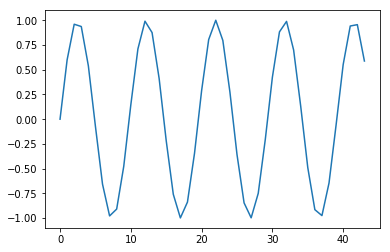

In [217]:
plt.plot(signal)